In [2]:
import numpy as np
import random
import sys
from scipy.stats import f
from scipy.stats import norm

listF=[]
listR=[]
listF_new=[]
listR_new=[]
#param = int(sys.argv[1])
for j in range(1000):
    np.random.seed(j)
    n=500 # mediciones efectuadas
    p=50 # variables medidas
    mu=0.0
    sigma=1.0
    X=np.random.normal(mu,sigma,size=(n,p))
    Y=np.random.normal(mu,sigma,size=(n,1))
    XT=X.T
    YT=Y.T
    Inv=np.linalg.inv(np.matmul(XT,X))
    beta1=np.matmul(Inv,XT)
    beta=np.matmul(beta1,Y)
    Hhat=np.matmul(X,beta1)
    Yideal=np.matmul(X,beta)

    SST1=np.matmul(np.identity(n)-(1.0/n)*np.ones((n,n)),Y)
    SST=np.matmul(YT,SST1)
    SSR1=np.matmul(Hhat-(1.0/n)*np.ones((n,n)),Y)
    SSR=np.matmul(YT,SSR1)
    SSE1=np.matmul(np.identity(n)-Hhat,Y)
    SSE=np.matmul(YT,SSE1)

    Rsq=SSR[0,0]/SST[0,0]
    listR.append(Rsq)

    sigma2=SSE[0,0]/(n-1.)
    sigmamatrix=sigma2*Inv
    sigma_i=np.zeros(p)
    for i in range(p):
        sigma_i[i]=sigmamatrix[i,i]
    sigma_i=np.sqrt(sigma_i)

    MSE=SSE[0,0]/(n-p-1)
    # Calculamos el MSR
    MSR=SSR[0,0]/p
    # Calculamos el MST
    MST=SST[0,0]/(n-1)
    F=(Rsq*(n-p-1))/((1-Rsq)*p)
    listF.append(F)


    Rango=0.9 # se define un rango, es decir cuanto porcentaje de la curva se quiere
    Ftest=f.ppf(Rango,p,n-(p+1))
    P_i=np.zeros(p)
    if F > Ftest:
        tzeros=beta[:,0]/sigma_i
        P_value=2*(1-norm.cdf(tzeros)) # se integran las colas
        for i in range(p):
            if P_value[i]<0.5:
                P_i[i]=1
            else:
                P_i[i]=0
        p_prime=np.sum(P_i)
        X_new=np.zeros((n,int(p_prime)))
        aux=0
        for i in range(p):
            if P_i[i]==1:
                X_new[:,aux]=X[:,i]
                aux+=1
        X_newT=X_new.T
        p=int(p_prime)
        Inv_new=np.linalg.inv(np.matmul(X_newT,X_new))
        beta1_new=np.matmul(Inv_new,X_newT)
        beta_new=np.matmul(beta1_new,Y)
        Hhat_new=np.matmul(X_new,beta1_new)
        Yideal_new=np.matmul(X_new,beta_new)
    
        SST1_new=np.matmul(np.identity(n)-(1.0/n)*np.ones((n,n)),Y)
        SST_new=np.matmul(YT,SST1_new)
        SSR1_new=np.matmul(Hhat_new-(1.0/n)*np.ones((n,n)),Y)
        SSR_new=np.matmul(YT,SSR1_new)
        SSE1_new=np.matmul(np.identity(n)-Hhat_new,Y)
        SSE_new=np.matmul(YT,SSE1_new)

        Rsq_new=SSR_new[0,0]/SST_new[0,0]
        listR_new.append(Rsq_new)

        sigma2_new=SSE_new[0,0]/(n-1.)
        sigmamatrix_new=sigma2_new*Inv_new
        sigma_i_new=np.zeros(p)
        for i in range(p):
            sigma_i_new[i]=sigmamatrix_new[i,i]
        sigma_i_new=np.sqrt(sigma_i_new)

        MSE_new=SSE_new[0,0]/(n-p-1)
        # Calculamos el MSR
        MSR_new=SSR_new[0,0]/p
        # Calculamos el MST
        MST_new=SST_new[0,0]/(n-1)

        F_new=(Rsq_new*(n-p-1))/((1-Rsq_new)*p)
        listF_new.append(F_new)        
    
        


In [3]:
print(listR, "\n", listF, "\n", listR_new, "\n", listF_new)

[0.07674214604362097, 0.07874033265068897, 0.08109846778318373, 0.0841919968505217, 0.07008825080036268, 0.0736740438488542, 0.16326244703313023, 0.08035213755189223, 0.08550081609302934, 0.11489219849037792, 0.0935478617445761, 0.09123639403291249, 0.09896015280848659, 0.0734423975631461, 0.10322145363037552, 0.11191347309013, 0.06554664745534519, 0.07389910917046369, 0.09744382307959477, 0.09262036116064473, 0.06320310323101833, 0.10880975841655688, 0.08810647903096419, 0.08769277309324901, 0.1202390754745632, 0.11298010430458781, 0.07672411250576903, 0.09277568126803422, 0.08927102518970931, 0.06945337105547782, 0.10406410063271666, 0.10878520630743747, 0.08264078232748626, 0.1001377742762695, 0.09697301954526949, 0.08091041726538305, 0.0905991793361944, 0.09345471289991825, 0.0651909101729794, 0.08691820564732787, 0.13280260542152997, 0.08623530605308218, 0.10999230034334886, 0.09806896263961999, 0.11255509597617261, 0.0740209627754342, 0.09717290534597965, 0.09168522483423837, 0.0

In [9]:
np.random.seed(3)

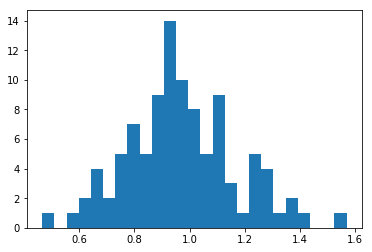

In [15]:
import matplotlib.pyplot as plt
plt.figure()
_=plt.hist(listF, bins=25)


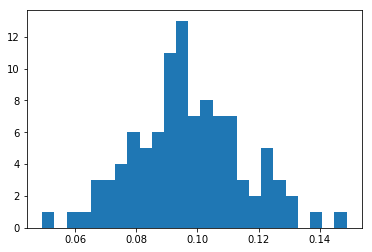

In [16]:
plt.figure()
_=plt.hist(listR, bins=25)

paila
